In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd



In [2]:
nominal_celltree_file = "input_files/newly_processed_files/PhysicsRun-2017_11_5_4_50_23-0013779-00270_20190207T153317_ext_unbiased_2_20190610T213810_simmxd_20190610T233509_g4_detsim_mix_r1a_r1b_postdlmctruth_r1c_postwcct_postdlmc_detsim_mix_postwcct.root"

merge_file = "input_files/newly_processed_files/merge.root"

nominal_slimmed_port_file = "input_files/newly_processed_files/PhysicsRun-2017_11_5_4_50_23-0013779-00270_20190207T153317_ext_unbiased_2_20190610T213810_simmxd_20190610T233509_g4_detsim_mix_r1a_r1b_postdlmctruth_r1c_postwcct_postdlmc_detsim_mix_postwcct_20241126T195201_overlayWCP.root"
nominal_plus_port_file = "input_files/newly_processed_files/PhysicsRun-2017_11_5_4_50_23-0013779-00270_20190207T153317_ext_unbiased_2_20190610T213810_simmxd_20190610T233509_g4_detsim_mix_r1a_r1b_postdlmctruth_r1c_postwcct_postdlmc_detsim_mix_postwcct_20241126T195201_overlayWCP_20241126T195312_WCPplus.root"
nominal_pf_port_file = "input_files/newly_processed_files/shorter_filename_WCPplus_20241127T171047_WCPF.root"
# GENIE reweight added files are in between here
nominal_reco2_file = "input_files/newly_processed_files/RootOutput-5e6e-23ef-939b-fad9_20241127T215718_WCPsl.root"
nominal_ntuple_file = "input_files/newly_processed_files/reco_stage_2_hist.root"

# these were when the PF step was failing due to a too long file name
#nominal_pf_port_file = "input_files/newly_processed_files/RootOutput-601c-1a89-abac-83f4.root"
#nominal_reco2_file = "input_files/newly_processed_files/RootOutput-540c-63a3-f506-9f90_20241126T212930_WCPsl.root"
#nominal_ntuple_file = "input_files/newly_processed_files/reco_stage_2_hist.root"


In [3]:
# 398 MB
f = uproot.open(nominal_celltree_file)

#spacepoint_xyz_by_event = f["Events"]["recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]"].array(library="np")

#print(f.items())
#f["Events"].items()

# no spacepoints in this file


In [4]:
f = uproot.open(merge_file)

f.items()

[('T_port_flash;1', <TTree 'T_port_flash' (10 branches) at 0x000127d4ab60>),
 ('T_port_2d;1', <TTree 'T_port_2d' (8 branches) at 0x00010521b940>),
 ('T_port_3d;1', <TTree 'T_port_3d' (13 branches) at 0x00010521bac0>),
 ('T_eval;1', <TTree 'T_eval' (33 branches) at 0x000127d4ab00>)]

In [5]:
f["T_port_3d"].items()

[('run', <TBranch 'run' at 0x000127dcd750>),
 ('subrun', <TBranch 'subrun' at 0x000127dcdf90>),
 ('event', <TBranch 'event' at 0x000127dce740>),
 ('main_flag', <TBranch 'main_flag' at 0x000127dceef0>),
 ('time_slice', <TBranch 'time_slice' at 0x000127dcf6a0>),
 ('ch_u', <TBranch 'ch_u' at 0x000127dcfe50>),
 ('ch_v', <TBranch 'ch_v' at 0x000127de0640>),
 ('ch_w', <TBranch 'ch_w' at 0x000127de0df0>),
 ('x', <TBranch 'x' at 0x000127de15a0>),
 ('y', <TBranch 'y' at 0x000127de1d50>),
 ('z', <TBranch 'z' at 0x000127de2500>),
 ('q', <TBranch 'q' at 0x000127de2ce0>),
 ('nq', <TBranch 'nq' at 0x000127de3490>)]

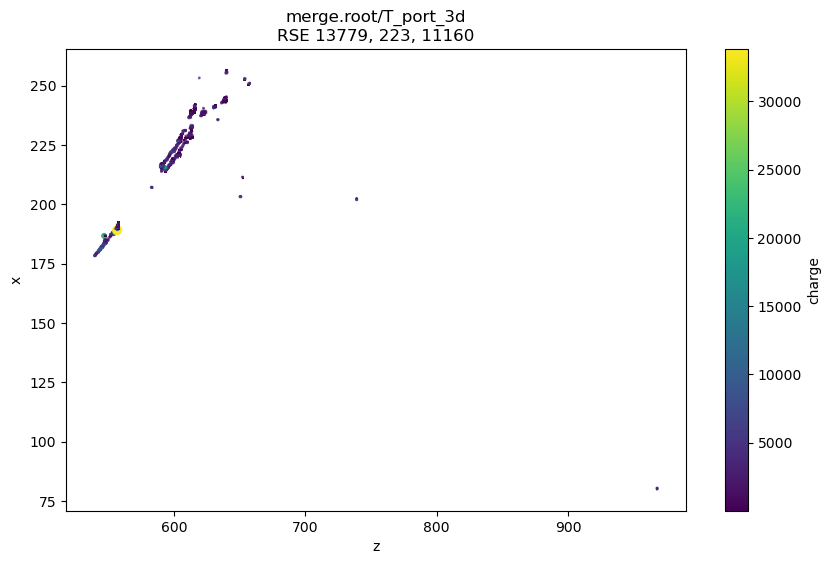

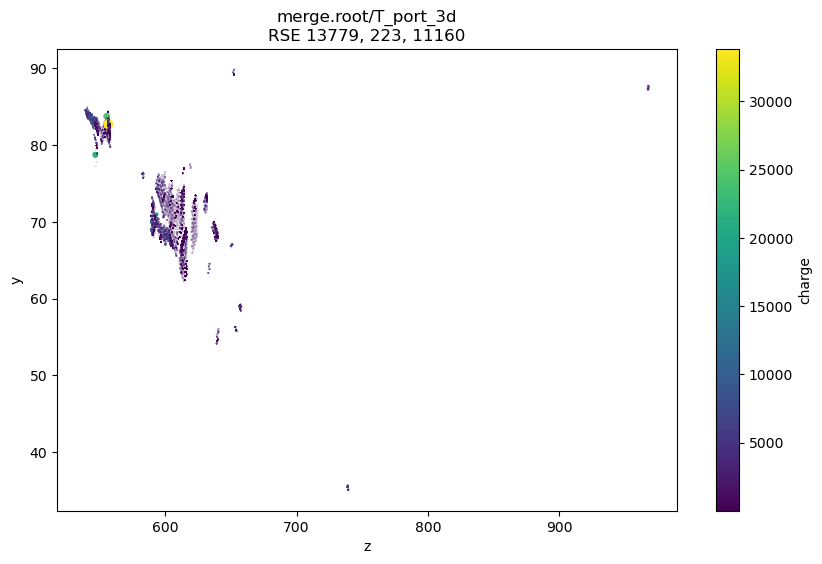

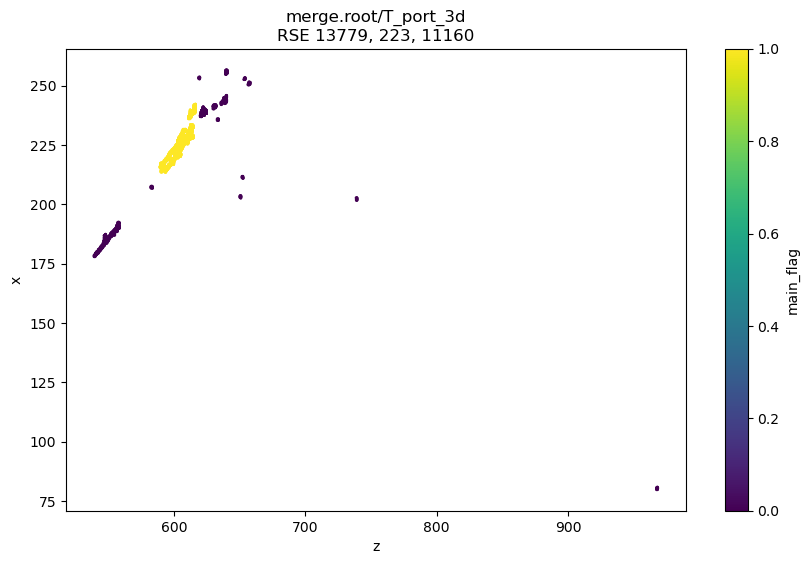

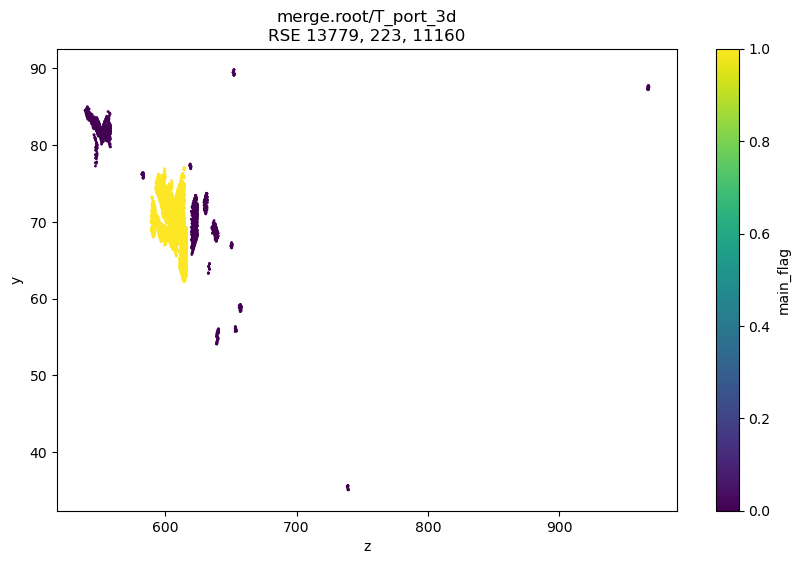

In [9]:
main_flag = f["T_port_3d"]["main_flag"].array(library="np")

run = f["T_port_3d"]["run"].array(library="np")
subrun = f["T_port_3d"]["subrun"].array(library="np")
event = f["T_port_3d"]["event"].array(library="np")

x = f["T_port_3d"]["x"].array(library="np")
y = f["T_port_3d"]["y"].array(library="np")
z = f["T_port_3d"]["z"].array(library="np")
q = f["T_port_3d"]["q"].array(library="np")

df = pd.DataFrame({"run": run, "subrun": subrun, "event": event, "x": x, "y": y, "z": z, "q": q, "main_flag": main_flag})

df_one_event = df.query("run == 13779 and subrun == 223 and event == 11160")

plt.figure(figsize=(10, 6))
plt.scatter(df_one_event["z"], df_one_event["x"], c=df_one_event["q"], s=(df_one_event["q"]/10000)**3)
plt.colorbar(label="charge")
plt.xlabel("z")
plt.ylabel("x")
plt.title("merge.root/T_port_3d\nRSE 13779, 223, 11160")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_one_event["z"], df_one_event["y"], c=df_one_event["q"], s=(df_one_event["q"]/10000)**3)
plt.colorbar(label="charge")
plt.xlabel("z")
plt.ylabel("y")
plt.title("merge.root/T_port_3d\nRSE 13779, 223, 11160")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_one_event["z"], df_one_event["x"], c=df_one_event["main_flag"], s=1)
plt.colorbar(label="main_flag")
plt.xlabel("z")
plt.ylabel("x")
plt.title("merge.root/T_port_3d\nRSE 13779, 223, 11160")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_one_event["z"], df_one_event["y"], c=df_one_event["main_flag"], s=1)
plt.colorbar(label="main_flag")
plt.xlabel("z")
plt.ylabel("y")
plt.title("merge.root/T_port_3d\nRSE 13779, 223, 11160")
plt.show()


In [7]:
print(1/0)

ZeroDivisionError: division by zero

(2563, 3)


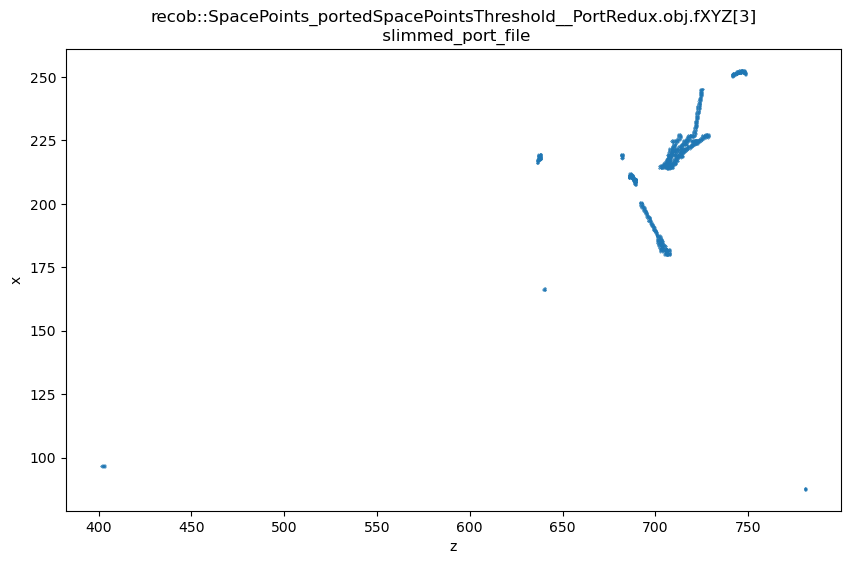

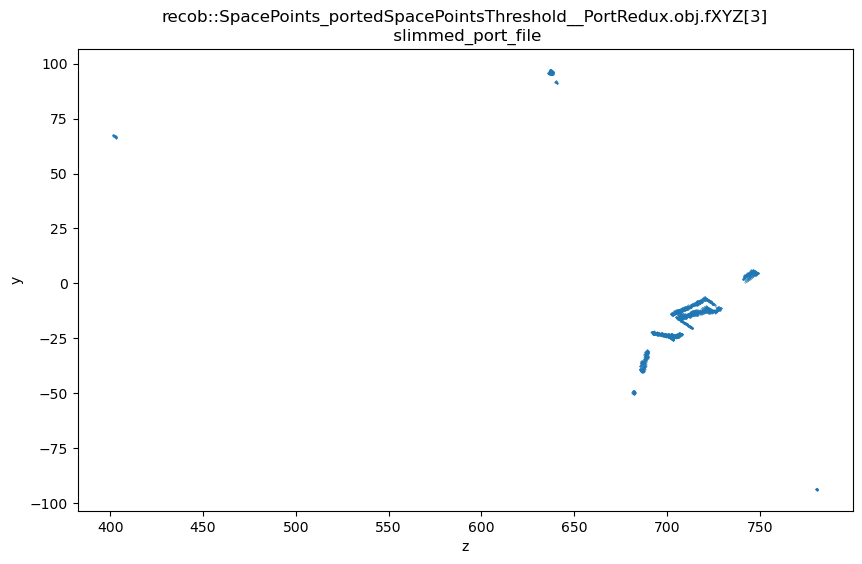

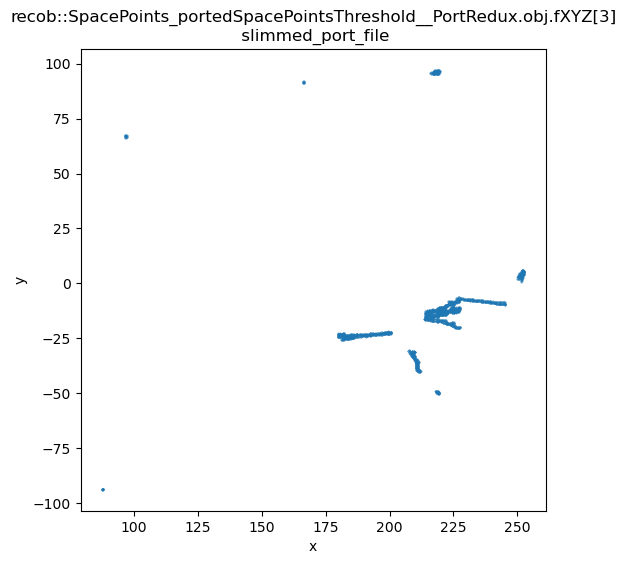

[('EventAuxiliary', <TBranchElement 'EventAuxiliary' at 0x000176547130>),
 ('art::TriggerResults_TriggerResults__DataOverlay.',
  <TBranchElement 'art::TriggerResults_TriggerResults__DataOverlay.' (3 subbranches) at 0x000176869780>),
 ('art::TriggerResults_TriggerResults__DataOverlay./art::TriggerResults_TriggerResults__DataOverlay.present',
  <TBranchElement 'art::TriggerResults_TriggerResults__DataOverlay.present' at 0x000176869ba0>),
 ('art::TriggerResults_TriggerResults__DataOverlay./art::TriggerResults_TriggerResults__DataOverlay.rangeSetID',
  <TBranchElement 'art::TriggerResults_TriggerResults__DataOverlay.rangeSetID' at 0x00017686a590>),
 ('art::TriggerResults_TriggerResults__DataOverlay./art::TriggerResults_TriggerResults__DataOverlay.obj',
  <TBranchElement 'art::TriggerResults_TriggerResults__DataOverlay.obj' at 0x00017686a890>),
 ('raw::ubdaqSoftwareTriggerData_swtrigger__DataOverlay.',
  <TBranchElement 'raw::ubdaqSoftwareTriggerData_swtrigger__DataOverlay.' (3 subbranches

In [7]:
# 400 MB
f = uproot.open(nominal_slimmed_port_file)

#print(f.items())
#f["Events"].items()

# there are spacepoints in this file

spacepoint_xyz_by_event = f["Events"]["recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]"].array(library="np")

spacepoint_xyz_one_event = spacepoint_xyz_by_event[8]

print(spacepoint_xyz_one_event.shape)

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 0], s=0.1)
plt.xlabel("z")
plt.ylabel("x")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n slimmed_port_file")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("z")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n slimmed_port_file")
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(spacepoint_xyz_one_event[:, 0], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n slimmed_port_file")
plt.show()

f["Events"].items()


(2563, 3)


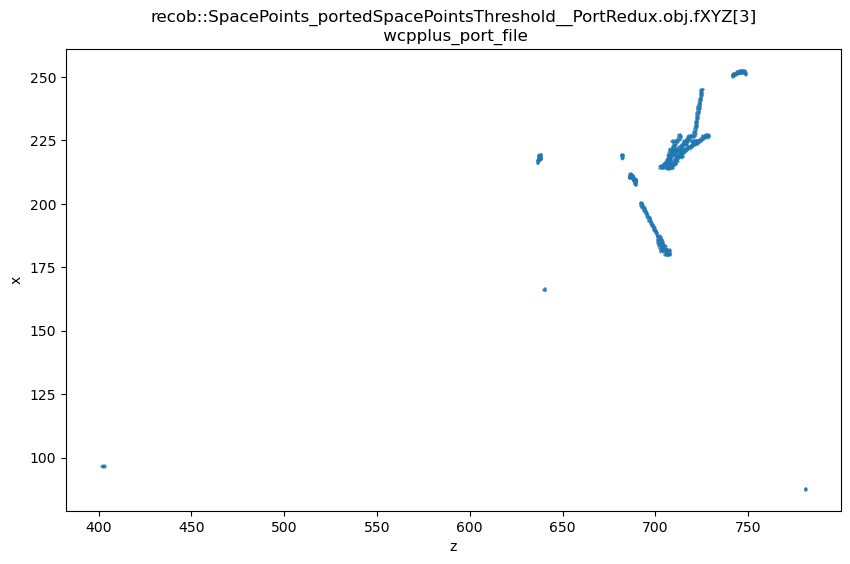

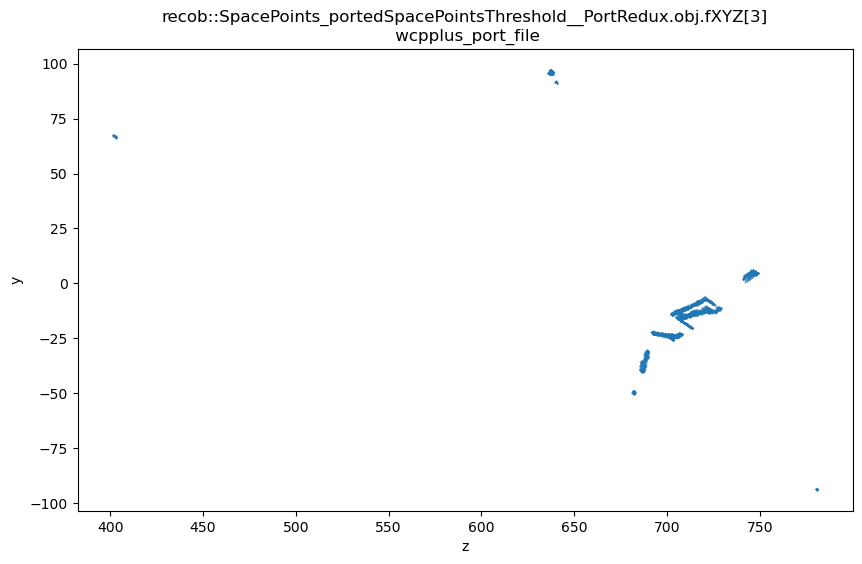

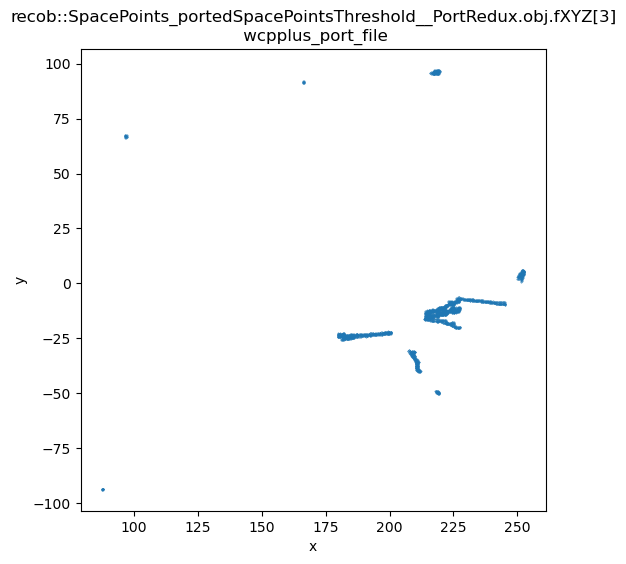

In [8]:
# 200 MB
f = uproot.open(nominal_plus_port_file)

# there are spacepoints in this file

spacepoint_xyz_by_event = f["Events"]["recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]"].array(library="np")

spacepoint_xyz_one_event = spacepoint_xyz_by_event[8]

print(spacepoint_xyz_one_event.shape)

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 0], s=0.1)
plt.xlabel("z")
plt.ylabel("x")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("z")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(spacepoint_xyz_one_event[:, 0], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()

(2563, 3)


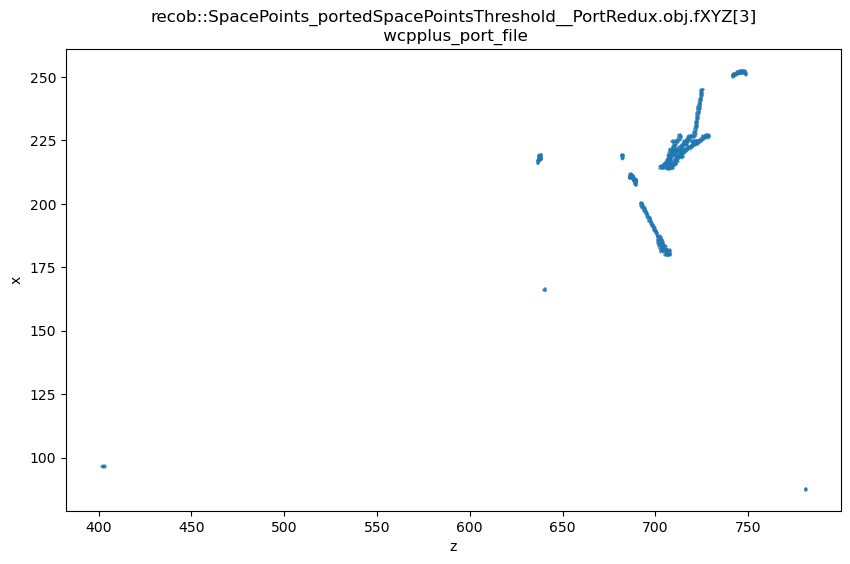

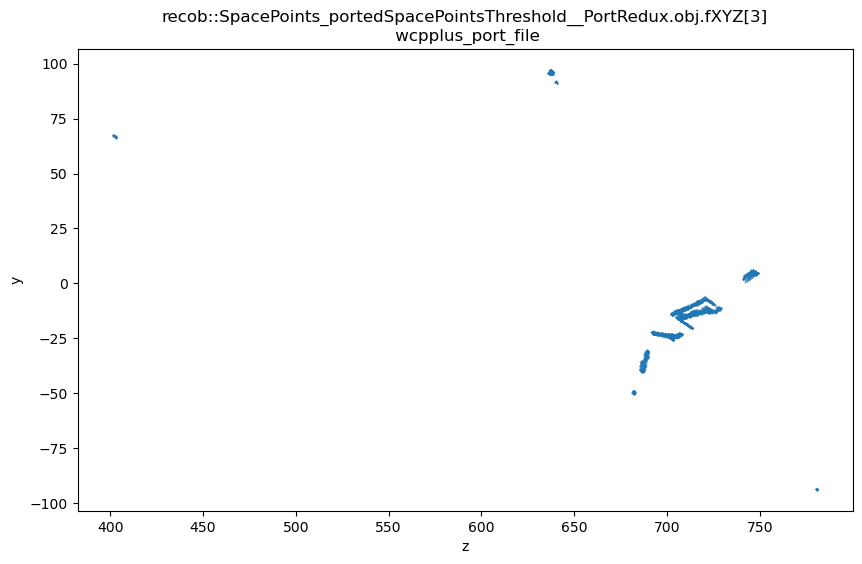

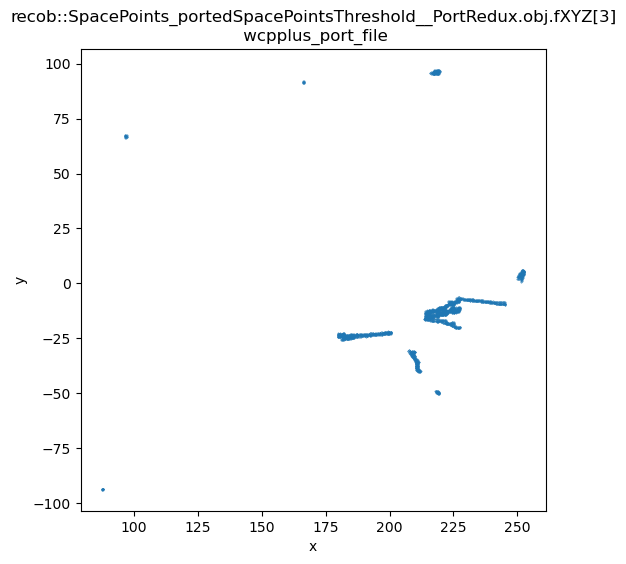

In [9]:
# 181 MB
f = uproot.open(nominal_pf_port_file)

spacepoint_xyz_by_event = f["Events"]["recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]"].array(library="np")

spacepoint_xyz_one_event = spacepoint_xyz_by_event[8]

print(spacepoint_xyz_one_event.shape)

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 0], s=0.1)
plt.xlabel("z")
plt.ylabel("x")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("z")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(spacepoint_xyz_one_event[:, 0], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()


(2563, 3)


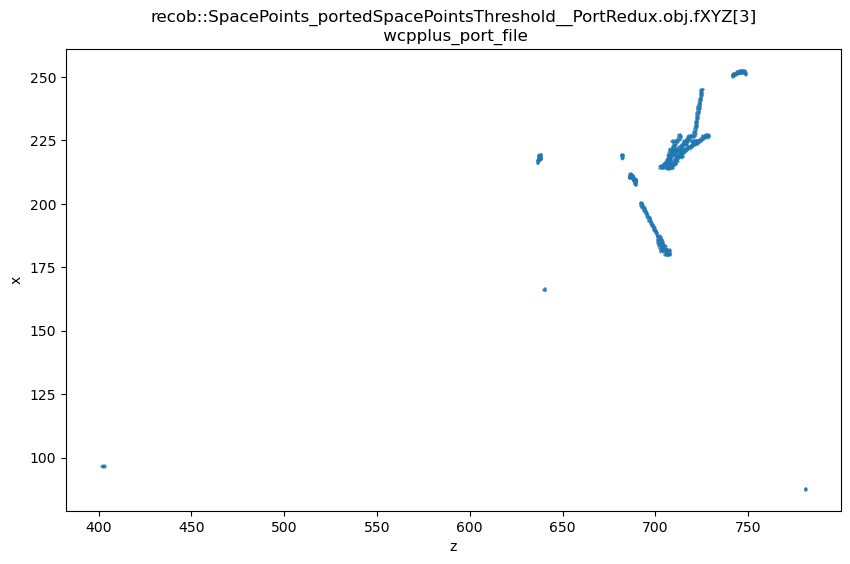

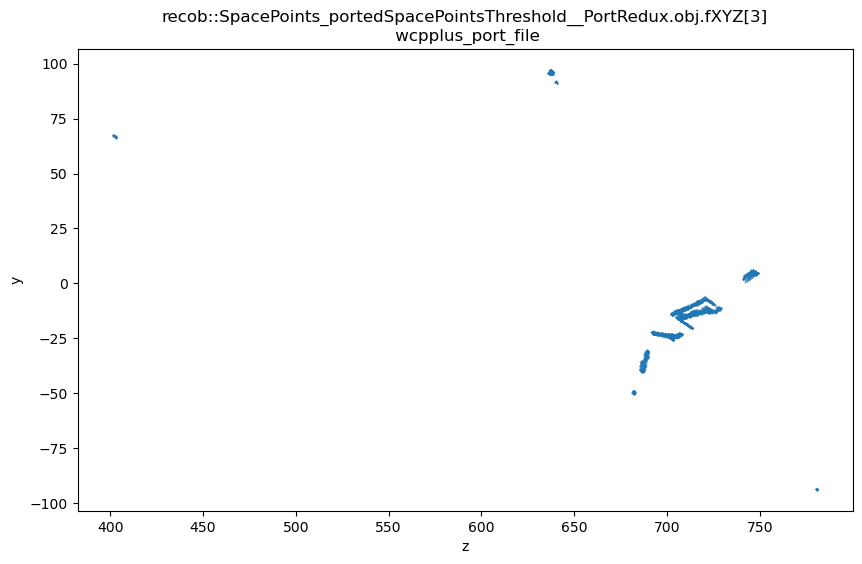

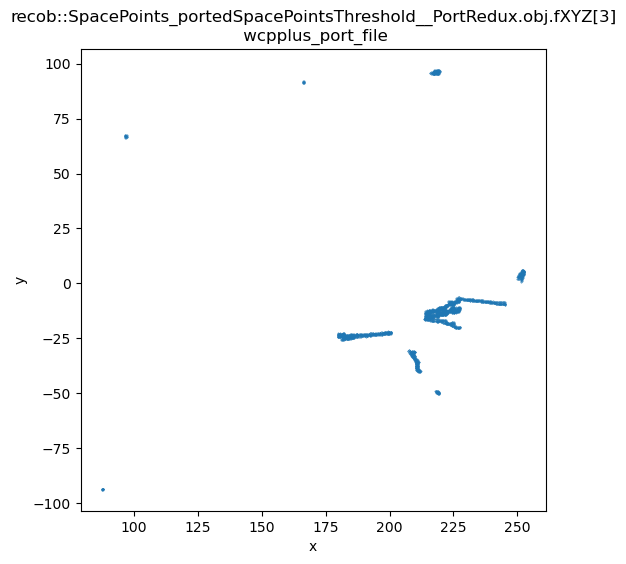

In [10]:
# 186 MB
f = uproot.open(nominal_reco2_file)

spacepoint_xyz_by_event = f["Events"]["recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]"].array(library="np")

spacepoint_xyz_one_event = spacepoint_xyz_by_event[8]

print(spacepoint_xyz_one_event.shape)

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 0], s=0.1)
plt.xlabel("z")
plt.ylabel("x")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("z")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(spacepoint_xyz_one_event[:, 0], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()


In [11]:
f = uproot.open(nominal_reco2_file)

# loop over content names
for key in f["Events"].keys():
    if "recob::SpacePoints" in key:
        print(key)


recob::SpacePoints_portedSpacePointsThreshold__PortRedux.
recob::SpacePoints_portedSpacePointsThreshold__PortRedux./recob::SpacePoints_portedSpacePointsThreshold__PortRedux.present
recob::SpacePoints_portedSpacePointsThreshold__PortRedux./recob::SpacePoints_portedSpacePointsThreshold__PortRedux.rangeSetID
recob::SpacePoints_portedSpacePointsThreshold__PortRedux./recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj
recob::SpacePoints_portedSpacePointsThreshold__PortRedux./recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj/recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fID
recob::SpacePoints_portedSpacePointsThreshold__PortRedux./recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj/recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]
recob::SpacePoints_portedSpacePointsThreshold__PortRedux./recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj/recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fErrXYZ[6]
recob::Spac

In [12]:
# 1.2 MB
f = uproot.open(nominal_ntuple_file)

spacepoint_xyz_by_event = f["Events"]["recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]"].array(library="np")

spacepoint_xyz_one_event = spacepoint_xyz_by_event[8]

print(spacepoint_xyz_one_event.shape)

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 0], s=0.1)
plt.xlabel("z")
plt.ylabel("x")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(spacepoint_xyz_one_event[:, 2], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("z")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(spacepoint_xyz_one_event[:, 0], spacepoint_xyz_one_event[:, 1], s=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("recob::SpacePoints_portedSpacePointsThreshold__PortRedux.obj.fXYZ[3]\n wcpplus_port_file")
plt.show()


KeyInFileError: not found: 'Events' (with any cycle number)

    Available keys: 'ER;1', 'FRV;1', 'PreC;1', 'PreD;1', 'FRH;1', 'PostC;1', 'PostO;1', 'wcpweights;1', 'PostDO;1', 'rICKR;1', 'rICKI;1', 'wcpselection;1', 'wcpweights/T_wgt;1', 'wcpselection/T_pot;1', 'wcpselection/T_eval;1'...

in file input_files/newly_processed_files/reco_stage_2_hist.root